<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%jsroot on
TCanvas c;
TF1 *sfit; //TF1指针定义在外部，避免定义在smart()内部时出现变量冲突。

In [2]:
TString fit(Double_t a,Double_t b,TString name){
    TString rtn;
    rtn.Form("Double_t %s(Double_t *x,Double_t *par){if(x[0]>%f&&x[0]<%f){TF1::RejectPoint();return 0;}return par[0]+par[1]*x[0];}",name.Data(),a,b);
    return rtn;
}//返回函数的字符串，避免每次手动修改函数脚本。

In [3]:
void smartfit(TH1F *h,Double_t fitl,Double_t fitr,Double_t cutl,Double_t cutr,TString name,TString option){
    //h为参与拟合的一维谱，fitl，fitr为参与拟合的总区间范围，cutl，cutr为不参与拟合的区间，name为拟合函数的名称。多次调用本函数时，应避免name重复。
    gROOT->ProcessLine(fit(cutl,cutr,name));
    //函数指针的方式实现动态调整函数参数比较麻烦，暂无法实现。采用gROOT则可以很简单地实现该目的。
    TString cmd;
    cmd.Form("sfit=new TF1(\"sfit\",%s,0,5000,2)",name.Data());
    gROOT->ProcessLine(cmd.Data());
    //终端环境下，cmd字符串内的name内容会被识别为函数名，但脚本中name表示的是字符串。或许可以用其他方式来实现该目的，但目前这种已足够简便。
    h->Fit("sfit",option,"",fitl,fitr);
}

Al22的能级纲图如下，βγ共有四支,332keV(51%),1384keV(10%),1716keV(0.76%),βpγ有1633keV.
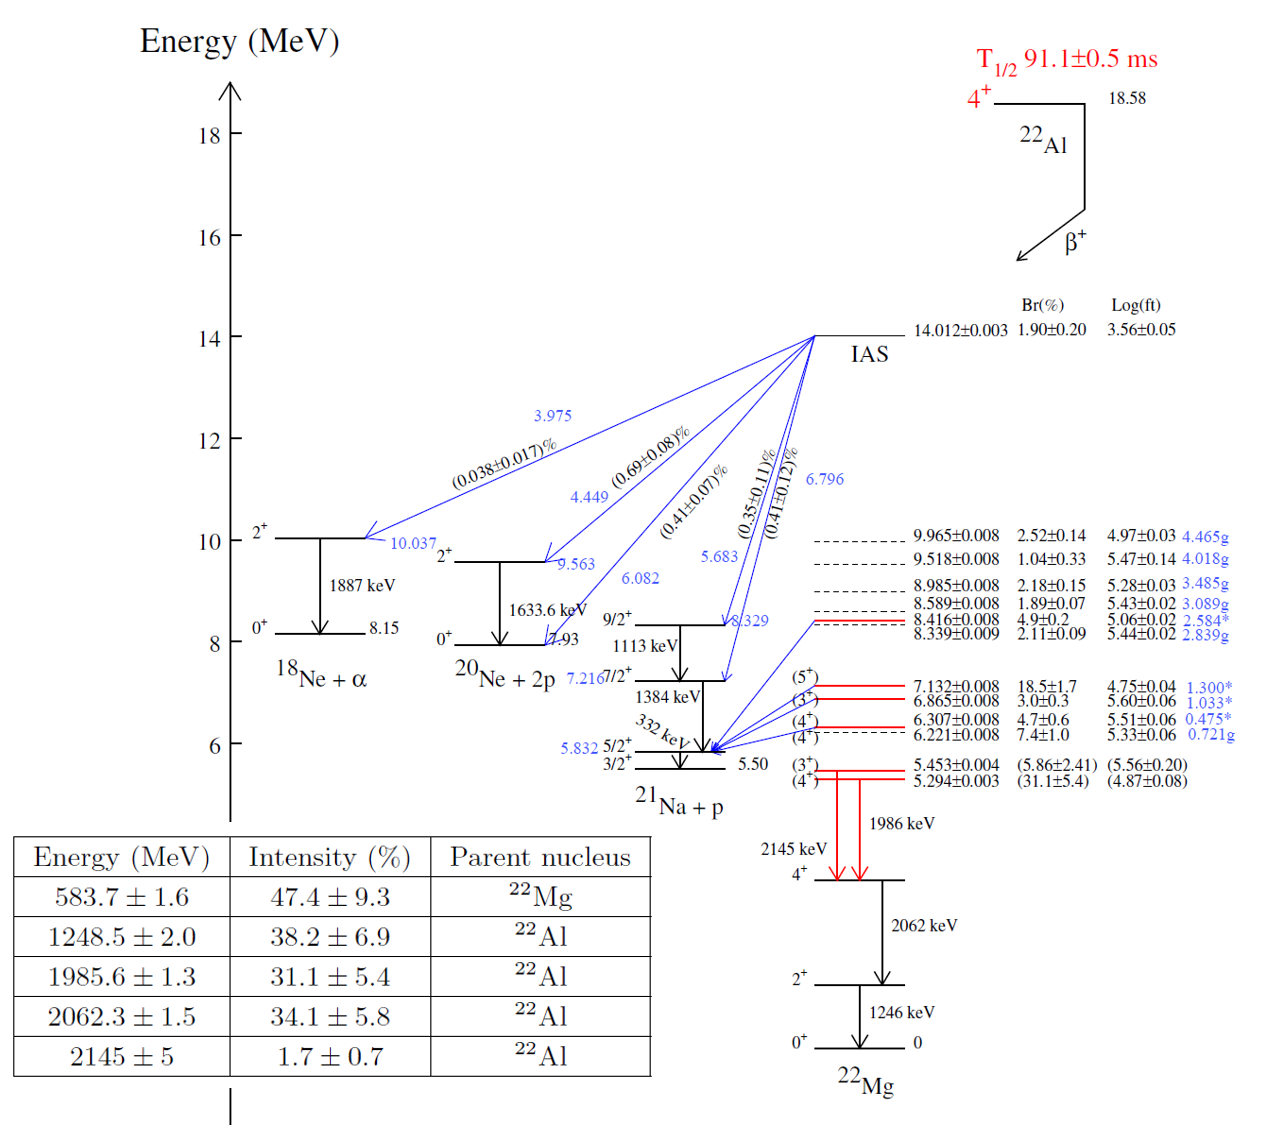

In [4]:
TFile fAl_50("corral_50.root");
fAl_50.cd();
tree->Draw("be>>s1(1000,0,10000)","cond==1&&bz==1&&dtime<91*5");
tree->Draw("be>>s2(1000,0,10000)","cond==1&&bz==1&&dtime>5000-91*5");
s1->Sumw2();
s1->Add(s2,-1);
s1->Draw();
c.Draw();

In [5]:
c.Clear();
tree->Draw("bea>>s3(1000,0,10000)","cond==1&&bz==2&&dtime<91*5");
tree->Draw("bea>>s4(1000,0,10000)","cond==1&&bz==2&&dtime>5000-91*5");
s3->Sumw2();
s3->Add(s4,-1);
s3->Draw();
c.Draw();

In [6]:
c.Clear();
tree->Draw("gea>>p1(10000,0,5000)","cond==1&&bz==1&&dtime<91*5");
tree->Draw("gea>>p2(10000,0,5000)","cond==1&&bz==1&&dtime>5000-91*5");
p1->Sumw2();
p1->Add(p2,-1);
p1->Draw();
c.Draw();

In [7]:
c.Clear();
tree->Draw("gea>>p3(10000,0,5000)","cond==1&&bz==2&&dtime<91*5");
tree->Draw("gea>>p4(10000,0,5000)","cond==1&&bz==2&&dtime>5000-91*5");
p3->Sumw2();
p3->Add(p4,-1);
p3->Draw();
c.Draw();

In [8]:
c.Clear();
smartfit(p3,1150,1350,1235,1255,"o1","L");
c.Draw();

(TF1 *) 0x7f4ba0a24f20
 FCN=251.908 FROM MIGRAD    STATUS=CONVERGED     103 CALLS         104 TOTAL
                     EDM=1.13651e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.01352e+00   1.08504e+00   7.54802e-04   1.41227e-03
   2  p1          -4.21561e-03   8.60735e-04   5.98834e-07   1.82759e+00
                               ERR DEF= 0.5


In [9]:
cout<<p3->Integral(2470,2510)<<'\n'<<(1+2510-2470)*(7.01358-4.21566e-03*(2510+2470.0)/4)<<endl;

554
72.3684


In [10]:
c.Clear();
smartfit(p3,1860,2040,1970,1990,"o2","L");
c.Draw();

(TF1 *) 0x7f4ba0adbea0
 FCN=193.83 FROM MIGRAD    STATUS=CONVERGED     105 CALLS         106 TOTAL
                     EDM=5.12889e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.33572e+00   9.08778e-01   4.95285e-04  -4.38601e-03
   2  p1          -2.29678e-03   4.64774e-04   2.53304e-07  -8.60510e+00
                               ERR DEF= 0.5


In [11]:
cout<<p3->Integral(3940,3980)<<'\n'<<(1+3980-3940)*(5.33572-2.29678e-03*(3980+3940.0)/4)<<endl;

288
32.3119


In [12]:
c.Clear();
 smartfit(p3,2000,2080,2045,2065,"o3","L");
c.Draw();

(TF1 *) 0x7f4ba0b40b60
 FCN=68.6636 FROM MIGRAD    STATUS=CONVERGED     103 CALLS         104 TOTAL
                     EDM=6.48782e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22155e+01   1.47834e+00   4.44153e-04  -1.04263e-02
   2  p1          -5.63828e-03   7.24768e-04   2.17782e-07  -2.12687e+01
                               ERR DEF= 0.5


In [13]:
cout<<p3->Integral(4090,4130)<<'\n'<<(1+4130-4090)*( 8.58394-3.67244e-03*(4130+4090.0)/4)<<endl;

304
42.5201


4205keV计数为16

In [14]:
c.Clear();
 smartfit(p3,4000,4400,4195,4210,"o4","L");
c.Draw();

(TF1 *) 0x7f4ba0aca9d0
 FCN=202.924 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
                     EDM=5.73606e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.77806e-01   1.78674e-01   1.22712e-04   1.88856e-02
   2  p1          -1.56129e-04   4.23713e-05   2.91040e-08   8.04827e+01
                               ERR DEF= 0.5


In [15]:
cout<<p3->Integral(8390,8420)<<'\n'<<(1+8420-8390)*(7.77806e-01-1.56129e-04*(8420+8390.0)/4)<<endl;

32
3.77189
